<a href="https://colab.research.google.com/github/adityachoudary54/covid19/blob/master/Covid19india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install --user kaggle

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [0]:
!dir

kaggle.json  sample_data


In [0]:
!mkdir ~/.kaggle

In [0]:
!pwd

/content


In [0]:
mv kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 57.7MB/s]


In [0]:
ls

covid19-in-india.zip  sample_data/


In [0]:
!unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('./covid_19_india.csv')

In [0]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
765,766,08/04/20,9:00 AM,Telengana,-,-,35,7,364
766,767,08/04/20,9:00 AM,Tripura,-,-,0,0,1
767,768,08/04/20,9:00 AM,Uttarakhand,-,-,5,0,31
768,769,08/04/20,9:00 AM,Uttar Pradesh,-,-,21,3,326


In [0]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [0]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [0]:
data=df.groupby('State/UnionTerritory',as_index=False)['Date', 'State/UnionTerritory']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [0]:
data=data.head(df.size)

In [0]:
data

,Date,State/UnionTerritory
0,30/01/20,Kerala
1,31/01/20,Kerala
2,01/02/20,Kerala
3,02/02/20,Kerala
4,03/02/20,Kerala
...,...,...
765,08/04/20,Telengana
766,08/04/20,Tripura
767,08/04/20,Uttarakhand
768,08/04/20,Uttar Pradesh


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

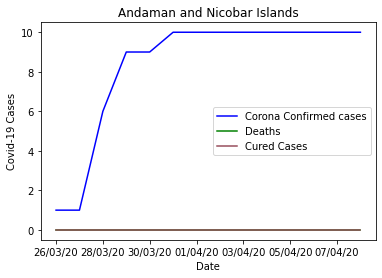

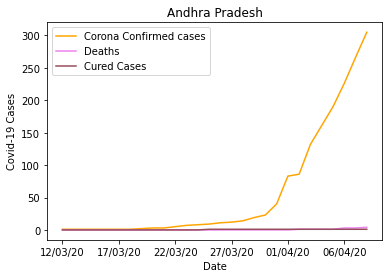

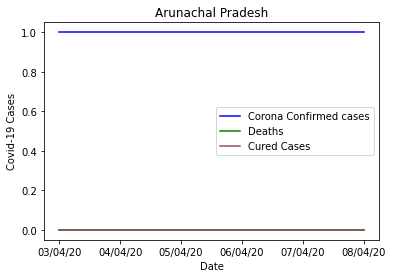

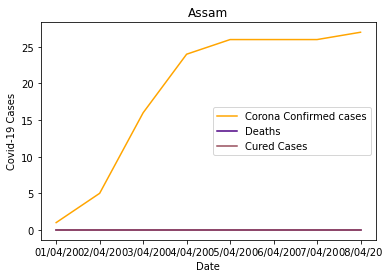

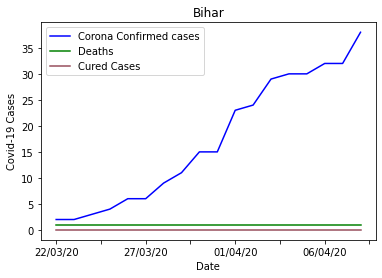

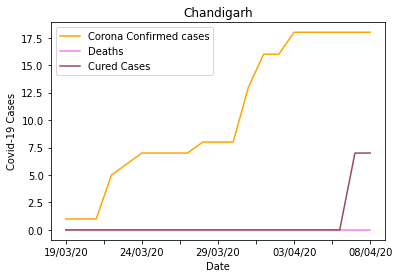

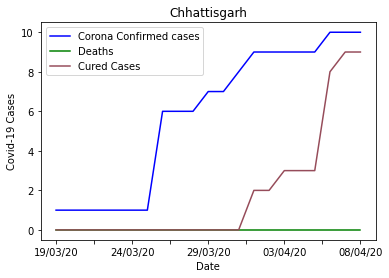

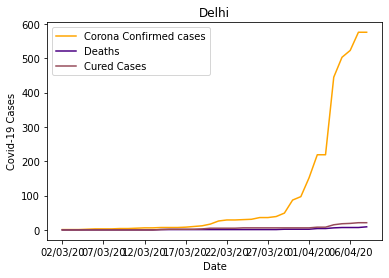

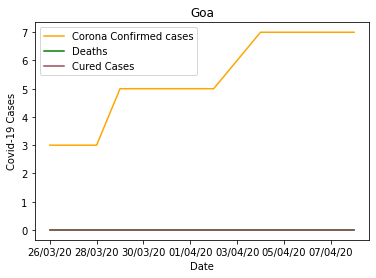

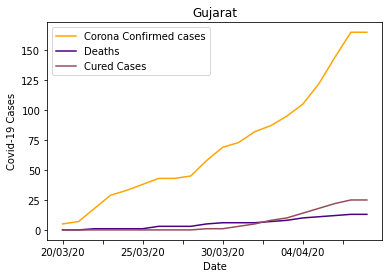

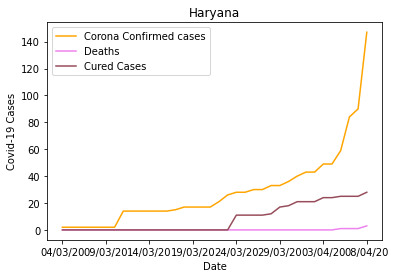

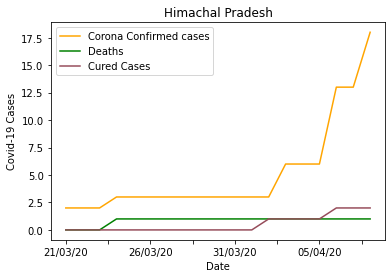

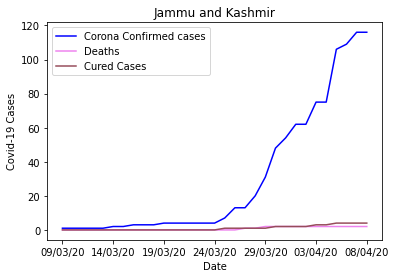

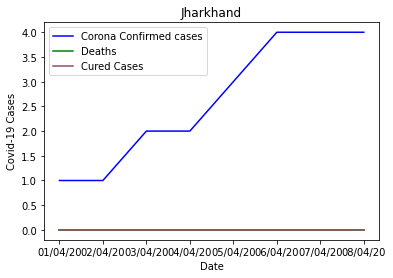

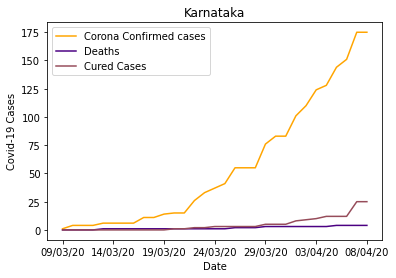

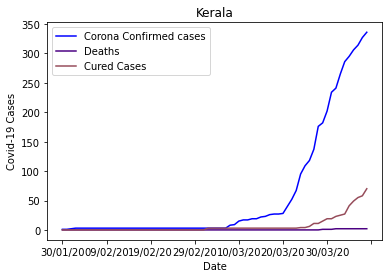

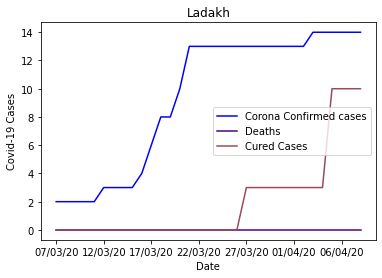

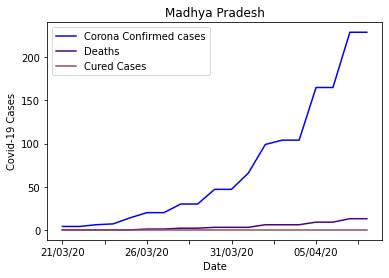

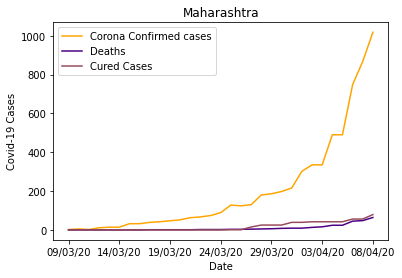

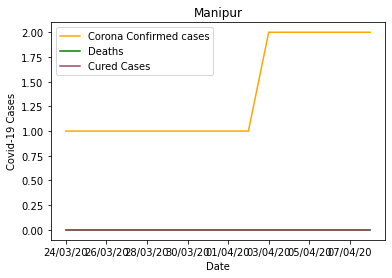

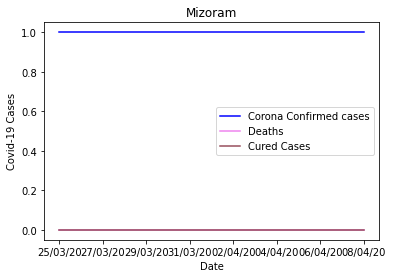

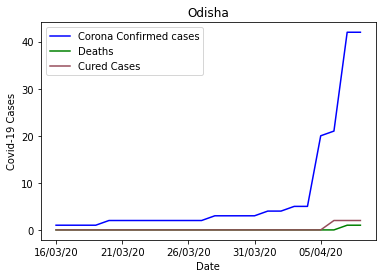

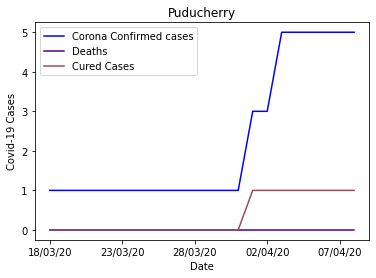

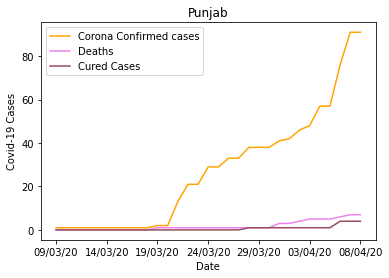

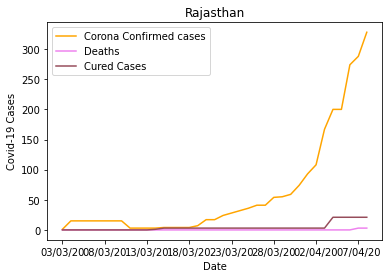

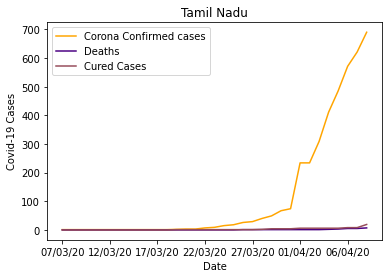

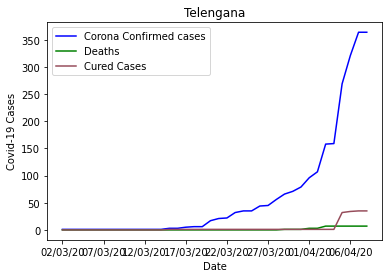

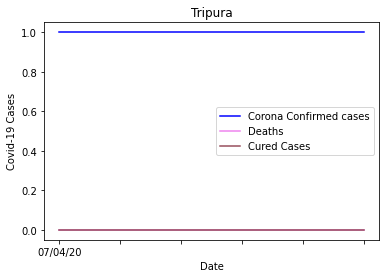

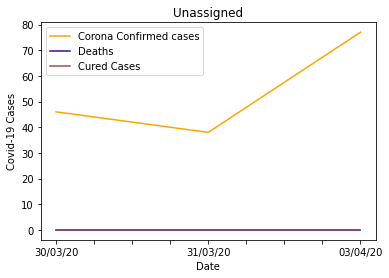

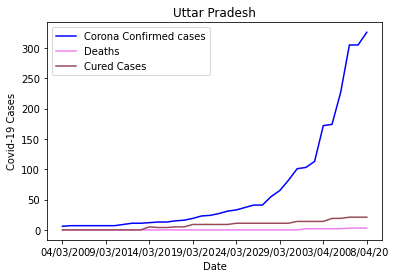

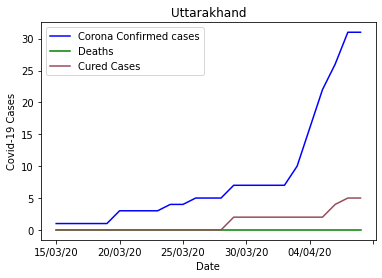

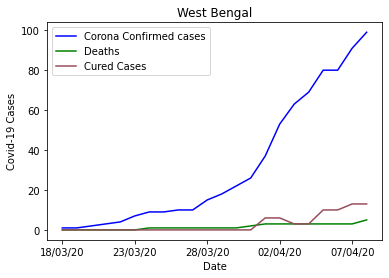

In [0]:
for (state, group) in df.groupby('State/UnionTerritory',as_index=False):
    # print("{0:30s} shape={1}".format(state, group.shape))
    group=pd.DataFrame(data=group,columns=['Date','Cured','Deaths', 'Confirmed'])
    fig,axis=plt.subplots()
    group.plot(kind='line',x='Date',y='Confirmed',color=np.random.choice(['orange','blue']),ax=axis,label='Corona Confirmed cases')
    group.plot(kind='line',x='Date',y='Deaths',color=np.random.choice(['violet','indigo','green']),ax=axis,label='Deaths')
    group.plot(kind='line',x='Date',y='Cured',color=(150/255,76/255,90/255),ax=axis,label='Cured Cases')
    plt.title(state)
    plt.xlabel('Date')
    plt.ylabel('Covid-19 Cases')
    # plt.show()
    plt.savefig("{} corona statistics.png".format(state),dpi=600)


In [0]:
!ls

 AgeGroupDetails.csv
'Andaman and Nicobar Islands corona statistics.png'
'Andhra Pradesh corona statistics.png'
'Arunachal Pradesh corona statistics.png'
'Assam corona statistics.png'
'Bihar corona statistics.png'
'Chandigarh corona statistics.png'
'Chhattisgarh corona statistics.png'
 covid_19_india.csv
 covid19-in-india.zip
'Delhi corona statistics.png'
'Goa corona statistics.png'
'Gujarat corona statistics.png'
'Haryana corona statistics.png'
'Himachal Pradesh corona statistics.png'
 HospitalBedsIndia.csv
 ICMRTestingDetails.csv
 ICMRTestingLabs.csv
 IndividualDetails.csv
'Jammu and Kashmir corona statistics.png'
'Jharkhand corona statistics.png'
'Karnataka corona statistics.png'
'Kerala corona statistics.png'
'Ladakh corona statistics.png'
'Madhya Pradesh corona statistics.png'
'Maharashtra corona statistics.png'
'Manipur corona statistics.png'
'Mizoram corona statistics.png'
'Odisha corona statistics.png'
 population_india_census2011.csv
'Puducherry corona statistics.png'
'Punjab 

In [0]:
import os

In [0]:
os.listdir()

['.config',
 'covid_19_india.csv',
 'Karnataka corona statistics.png',
 'Odisha corona statistics.png',
 'Mizoram corona statistics.png',
 'Manipur corona statistics.png',
 'Andhra Pradesh corona statistics.png',
 'Uttarakhand corona statistics.png',
 'covid19-in-india.zip',
 'Ladakh corona statistics.png',
 'Assam corona statistics.png',
 'Haryana corona statistics.png',
 'ICMRTestingDetails.csv',
 'Punjab corona statistics.png',
 'Madhya Pradesh corona statistics.png',
 'AgeGroupDetails.csv',
 'Arunachal Pradesh corona statistics.png',
 'Andaman and Nicobar Islands corona statistics.png',
 'IndividualDetails.csv',
 'Rajasthan corona statistics.png',
 'Kerala corona statistics.png',
 'Unassigned corona statistics.png',
 'Tamil Nadu corona statistics.png',
 'Gujarat corona statistics.png',
 'Chhattisgarh corona statistics.png',
 'ICMRTestingLabs.csv',
 'Delhi corona statistics.png',
 'Jharkhand corona statistics.png',
 'Bihar corona statistics.png',
 'HospitalBedsIndia.csv',
 'populati

In [0]:
!mkdir coronaGraphPics

In [0]:
import shutil
for item in os.listdir():
  if "png" in item :
    shutil.copy2(item,"coronaGraphPics/{}".format(item))

In [0]:
!pwd

/content


In [0]:
!zip -r coronaGraphPics.zip coronaGraphPics

  adding: coronaGraphPics/ (stored 0%)
  adding: coronaGraphPics/Karnataka corona statistics.png (deflated 19%)
  adding: coronaGraphPics/Odisha corona statistics.png (deflated 22%)
  adding: coronaGraphPics/Mizoram corona statistics.png (deflated 25%)
  adding: coronaGraphPics/Manipur corona statistics.png (deflated 23%)
  adding: coronaGraphPics/Andhra Pradesh corona statistics.png (deflated 20%)
  adding: coronaGraphPics/Uttarakhand corona statistics.png (deflated 20%)
  adding: coronaGraphPics/Ladakh corona statistics.png (deflated 20%)
  adding: coronaGraphPics/Assam corona statistics.png (deflated 20%)
  adding: coronaGraphPics/Haryana corona statistics.png (deflated 19%)
  adding: coronaGraphPics/Punjab corona statistics.png (deflated 20%)
  adding: coronaGraphPics/Madhya Pradesh corona statistics.png (deflated 21%)
  adding: coronaGraphPics/Arunachal Pradesh corona statistics.png (deflated 25%)
  adding: coronaGraphPics/Andaman and Nicobar Islands corona statistics.png (deflate

In [0]:
files.download("coronaGraphPics.zip")